<a href="https://colab.research.google.com/github/mechamrit/Python_Lab/blob/main/Lab_Practical1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Practical:1



In [ ]:
## Importing CSV
import pandas as pd
import matplotlib.pyplot as plt
 
df = pd.read_csv('/content/data_lab1.csv')

## Analyzing and Cleaning Data

In [ ]:
## Getting Info about Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,0.000
mean,30371831.432,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,0.405,1.217,2.866,40.337,0.007,0.025,0.032,0.012,0.021,0.004,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084,nan
std,125020585.612,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,0.277,0.552,2.022,45.491,0.003,0.018,0.030,0.006,0.008,0.003,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018,nan
min,8670.000,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,0.112,0.360,0.757,6.802,0.002,0.002,0.000,0.000,0.008,0.001,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055,nan
25%,869218.000,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,0.232,0.834,1.606,17.850,0.005,0.013,0.015,0.008,0.015,0.002,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071,nan
50%,906024.000,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,0.324,1.108,2.287,24.530,0.006,0.020,0.026,0.011,0.019,0.003,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080,nan
75%,8813129.000,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,0.479,1.474,3.357,45.190,0.008,0.032,0.042,0.015,0.023,0.005,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092,nan
max,911320502.000,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,2.873,4.885,21.980,542.200,0.031,0.135,0.396,0.053,0.079,0.030,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207,nan


In [ ]:
df.shape

(569, 33)

In [ ]:
## Finding Relationships 
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000,0.075,0.100,0.073,0.097,-0.013,0.000,0.050,0.044,-0.022,-0.053,0.143,-0.008,0.137,0.178,0.097,0.034,0.055,0.079,-0.017,0.026,0.082,0.065,0.080,0.107,0.010,-0.003,0.023,0.035,-0.044,-0.030,nan
radius_mean,0.075,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,0.679,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007,nan
texture_mean,0.100,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,0.276,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119,nan
perimeter_mean,0.073,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,0.692,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051,nan
area_mean,0.097,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,0.733,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004,nan
smoothness_mean,-0.013,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,0.301,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499,nan
compactness_mean,0.000,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,0.497,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687,nan
concavity_mean,0.050,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,0.632,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515,nan
concave points_mean,0.044,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,0.698,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369,nan
symmetry_mean,-0.022,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,0.303,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438,nan


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
## Cleaning the Dataset
df.drop(['Unnamed: 32'], axis=1, inplace = True)
df.drop(['id'], axis=1, inplace = True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

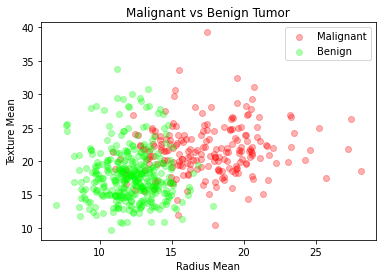

In [ ]:
## Visualizing 
M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]

plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [ ]:
## Feature Columns
feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
x = df[feature_cols]
y = df.diagnosis.values

## Training

In [ ]:
## Using Min Max Normalization 
import numpy as np
x = (x - np.min(x)) / (np.max(x) - np.min(x))

## Splitting the Dataset 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
## Applying the Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.9239766081871345


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
y_pred = nb.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[103,   5],
       [  8,  55]])

Text(0.5, 1.0, 'Accuracy Score: 0.9239766081871345')

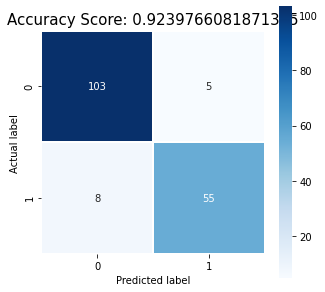

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=1.0, annot=True,square = True,  cmap = 'Blues', fmt='g')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(nb.score(x_test, y_test))
plt.title(all_sample_title, size = 15)